In [1]:
import shapely
from shapely.geometry import *

In [2]:
lines = [
    ((0, 0), (0 , 0.33)),
    ((0, 0.33), (0 , 0.66)),
    ((0, 0.66), (0 , 1)),
    ((0, 1), (1 , 1)),
    ((1, 1), (1 , 0)),
    ((1, 0), (0 , 0)),
]

multi_line = MultiLineString(lines)

In [3]:
polygon = multi_line.convex_hull

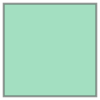

In [4]:
polygon

In [5]:
irregular_polygon_lines = [
    ((0, 0), (0 , 0.33)),
    ((0, 0.33), (0 , 0.66)),
    ((0, 0.66), (0 , 1)),
    ((0, 1), (1 , 1)),
    ((1, 1), (1, 0.5)),
    ((1, 0.5), (2, 0.5)),
    ((2, 0.5), (2, 0)),
    ((2, 0), (1, 0)),
    ((1, 0), (0, 0)),
]

irregular_multi_line = MultiLineString(irregular_polygon_lines)
irregular_polygon = irregular_multi_line.convex_hull

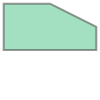

In [6]:
irregular_polygon

In [7]:
print(irregular_polygon)

POLYGON ((0 0, 0 1, 1 1, 2 0.5, 2 0, 0 0))


In [8]:
Polygon(irregular_multi_line)

NotImplementedError: Multi-part geometries do not themselves provide the array interface

In [10]:
from shapely.ops import *

In [15]:
irregular_polygon_from_polygonize = list(polygonize(irregular_multi_line))[0]

In [16]:
print(irregular_polygon_from_polygonize)

POLYGON ((0 0, 0 0.33, 0 0.66, 0 1, 1 1, 1 0.5, 2 0.5, 2 0, 1 0, 0 0))


In [21]:
# irregular_polygon_from_polygonize.simplify(0.05)
print('tolerance: 0.05', irregular_polygon_from_polygonize.simplify(0.05))
print('tolerance: 0.5', irregular_polygon_from_polygonize.simplify(0.5))
print('tolerance: 1', irregular_polygon_from_polygonize.simplify(1))
print('tolerance: 0.0', irregular_polygon_from_polygonize.simplify(0.0))

tolerance: 0.05 POLYGON ((0 0, 0 1, 1 1, 1 0.5, 2 0.5, 2 0, 0 0))
tolerance: 0.5 POLYGON ((0 0, 0 1, 2 0.5, 2 0, 0 0))
tolerance: 1 POLYGON ((0 0, 0 1, 2 0.5, 2 0, 0 0))
tolerance: 0.0 POLYGON ((0 0, 0 1, 1 1, 1 0.5, 2 0.5, 2 0, 0 0))


In [25]:
BUFFER = 0.1
p1 = Point(0, 0).buffer(BUFFER)
p2 = Point(10, 0).buffer(BUFFER)

In [26]:
LineString([p1, p2])

ValueError: Input [<shapely.geometry.polygon.Polygon object at 0x7f123c43f6a0>, <shapely.geometry.polygon.Polygon object at 0x7f123c43f610>] is the wrong shape for a LineString

In [27]:
p1.geom_type

'Polygon'

In [31]:
# Lines:
# 0, 0: 9.9 0
# 10.0: 11.0
# 11.1: 11.3
# 11.35: 12
# -0.1: 12

In [15]:
points=  [
    0,
    10.0,
    11.1,
    11.35,
    -0.1
]
points = list(map(lambda point: (point, 0), points))

In [16]:
second_points=  [
    9.9,
    11.0,
    11.3,
    12,
    12
]
second_points = list(map(lambda point: (point, 0), second_points))

In [17]:
lines = []
for i in range(len(points)):
    line_segment = (points[i], second_points[i])
    lines.append(line_segment)
lines

[((0, 0), (9.9, 0)),
 ((10.0, 0), (11.0, 0)),
 ((11.1, 0), (11.3, 0)),
 ((11.35, 0), (12, 0)),
 ((-0.1, 0), (12, 0))]

In [18]:
print("linemerge", linemerge(lines).wkt)
lines_for_union = list(map(LineString, lines))
point_union = unary_union(lines_for_union)
print("union", point_union.wkt)
print("after_union: ", linemerge(point_union).wkt)

linemerge MULTILINESTRING ((-0.1 0, 12 0, 11.35 0), (0 0, 9.9 0), (10 0, 11 0), (11.1 0, 11.3 0))
union MULTILINESTRING ((0 0, 9.9 0), (10 0, 11 0), (11.1 0, 11.3 0), (11.35 0, 12 0), (-0.1 0, 0 0), (9.9 0, 10 0), (11 0, 11.1 0), (11.3 0, 11.35 0))
after_union:  LINESTRING (-0.1 0, 0 0, 9.9 0, 10 0, 11 0, 11.1 0, 11.3 0, 11.35 0, 12 0)
